In [26]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#import files
path = r'..\02 Data\Original Data'
path2 = r'..\02 Data\Prepared Data'

#import dataframe
df_ords_merged = pd.read_pickle(os.path.join(path2,'orders_products_merged.pkl'))

<AxesSubplot:>

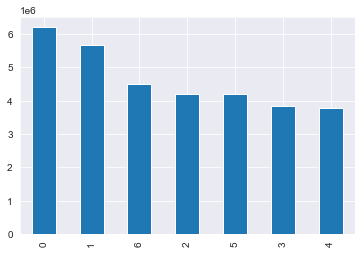

In [27]:
df_ords_merged['order_dow'].value_counts().plot.bar()

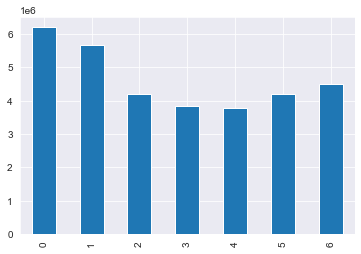

In [28]:
bar = df_ords_merged['order_dow'].value_counts().sort_index().plot.bar()

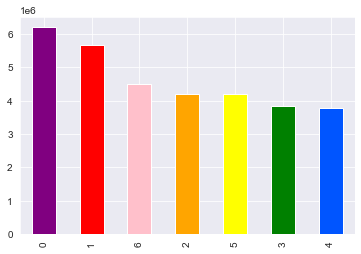

In [29]:
bar = df_ords_merged['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', '#0055ff'])

In [30]:
bar.figure.savefig(os.path.join(path2, 'bar_orders.dow.png'))

<AxesSubplot:ylabel='Frequency'>

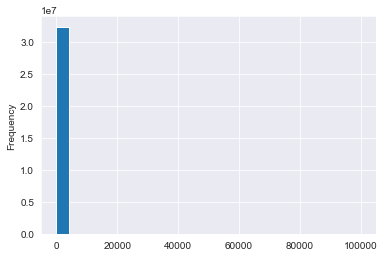

In [31]:
df_ords_merged['prices'].plot.hist(bins = 25)

In [32]:
df_ords_merged.loc[df_ords_merged['prices'] > 100]

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge
10030345,171,171,912404,17,prior,12,2,14,5.0,21553,5,0,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both
10030346,181,181,603376,17,prior,22,6,16,4.0,21553,3,1,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both
10030347,1944,1944,3264360,135,prior,2,2,21,13.0,21553,6,0,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both
10030348,1945,1945,892534,135,prior,3,0,8,12.0,21553,3,1,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both
10030349,5708,5708,229704,342,prior,8,1,19,30.0,21553,9,0,21554,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,3386542,2249946,204099,prior,29,0,8,4.0,33664,1,0,33666,2 % Reduced Fat Milk,84,16,99999.0,both
29166210,3386544,3386544,2363282,204099,prior,31,0,9,2.0,33664,1,1,33666,2 % Reduced Fat Milk,84,16,99999.0,both
29166211,3391313,3391313,3181945,204395,prior,13,3,15,8.0,33664,25,0,33666,2 % Reduced Fat Milk,84,16,99999.0,both
29166212,3405096,3405096,2486215,205227,prior,7,3,20,4.0,33664,8,0,33666,2 % Reduced Fat Milk,84,16,99999.0,both


In [33]:
df_ords_merged.loc[df_ords_merged['prices'] > 100, 'prices'] = np.nan

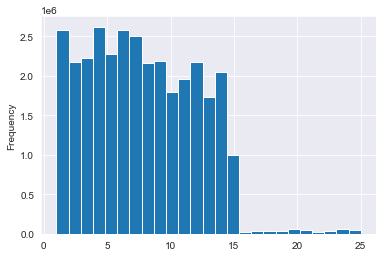

In [34]:
hist = df_ords_merged['prices'].plot.hist(bins=25)

In [35]:
#create a list holding t/f values to the test np.random.rand
np.random.seed(4)
dev = np.random.rand(len(df_ords_merged)) <= .7

#store 70% of the sample in the df big
big = df_ords_merged[dev]

#store 30% of the sample in the df small
small = df_ords_merged[~dev]

len(df_ords_merged)

32404859

In [36]:
len(big) + len(small)

32404859

In [37]:
df_2 = small[['order_dow','prices']]

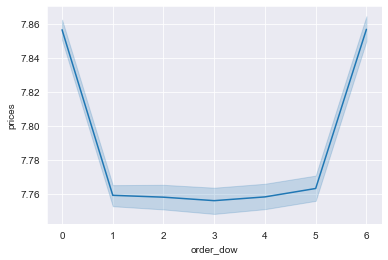

In [38]:
line = sns.lineplot(data = df_2, x='order_dow', y='prices')